### The aim of this project is to classify the wine into 3 classes based on the input variables provided in the dataset. Its a classification problem.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("winedataset.txt")
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.shape

(178, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                   178 non-null int64
Alcohol                 178 non-null float64
Malic acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity of ash       178 non-null float64
Magnesium               178 non-null int64
Total phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color intensity         178 non-null float64
Hue                     178 non-null float64
diluted wines           178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


There are no missing values in the datset.

In [7]:
#Checking for outliers.All values are between +1.96 to -1.96
df.skew()

Class                   0.107431
Alcohol                -0.051482
Malic acid              1.039651
Ash                    -0.176699
Alcalinity of ash       0.213047
Magnesium               1.098191
Total phenols           0.086639
Flavanoids              0.025344
Nonflavanoid phenols    0.450151
Proanthocyanins         0.517137
Color intensity         0.868585
Hue                     0.021091
diluted wines          -0.307285
Proline                 0.767822
dtype: float64

## EDA

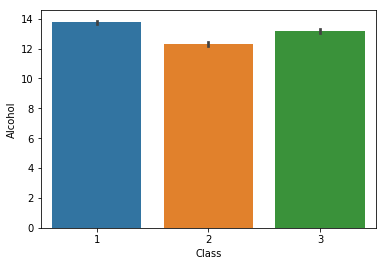

In [8]:
sns.barplot(df['Class'],df['Alcohol'])
plt.show()

From the above graph it can be observed that alcohol content is more in class one

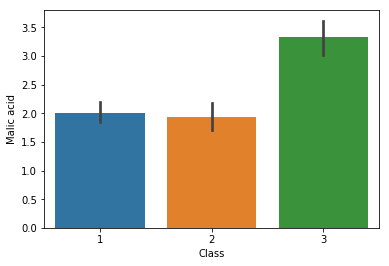

In [9]:
sns.barplot(df['Class'],df['Malic acid'])
plt.show()

From the above barplot, we can see that content of malic acid is more in class 3 wine.

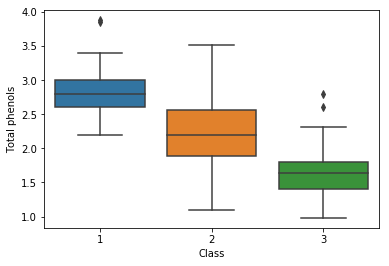

In [10]:
sns.boxplot(df['Class'],df['Total phenols'])
plt.show()

From the above box plot it can be seen that Total phenols are more in class 1 wine

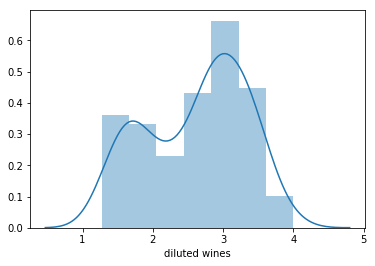

In [11]:
sns.distplot(df['diluted wines'])
plt.show()

From the above distplot, we can see that the distribution is bi-modal

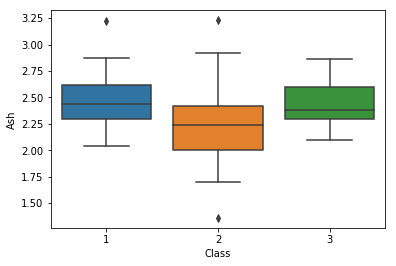

In [12]:
sns.boxplot(df['Class'],df['Ash'],data=df)
plt.show()

From the above box plot Class 2 is having least amount of Ash

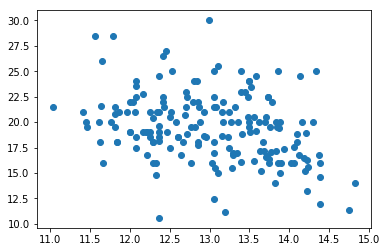

In [13]:
plt.scatter(df['Alcohol'],df['Alcalinity of ash'])
plt.show()

From the above scatter plot, we can see that alcohol and alcalinity of ash are slightly negatively related.

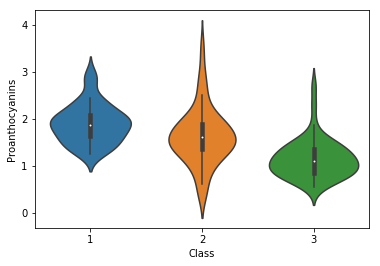

In [14]:
sns.violinplot(df['Class'],df['Proanthocyanins'])
plt.show()

From the above violin plot, Proanthocyanins are greater in class1 wine.

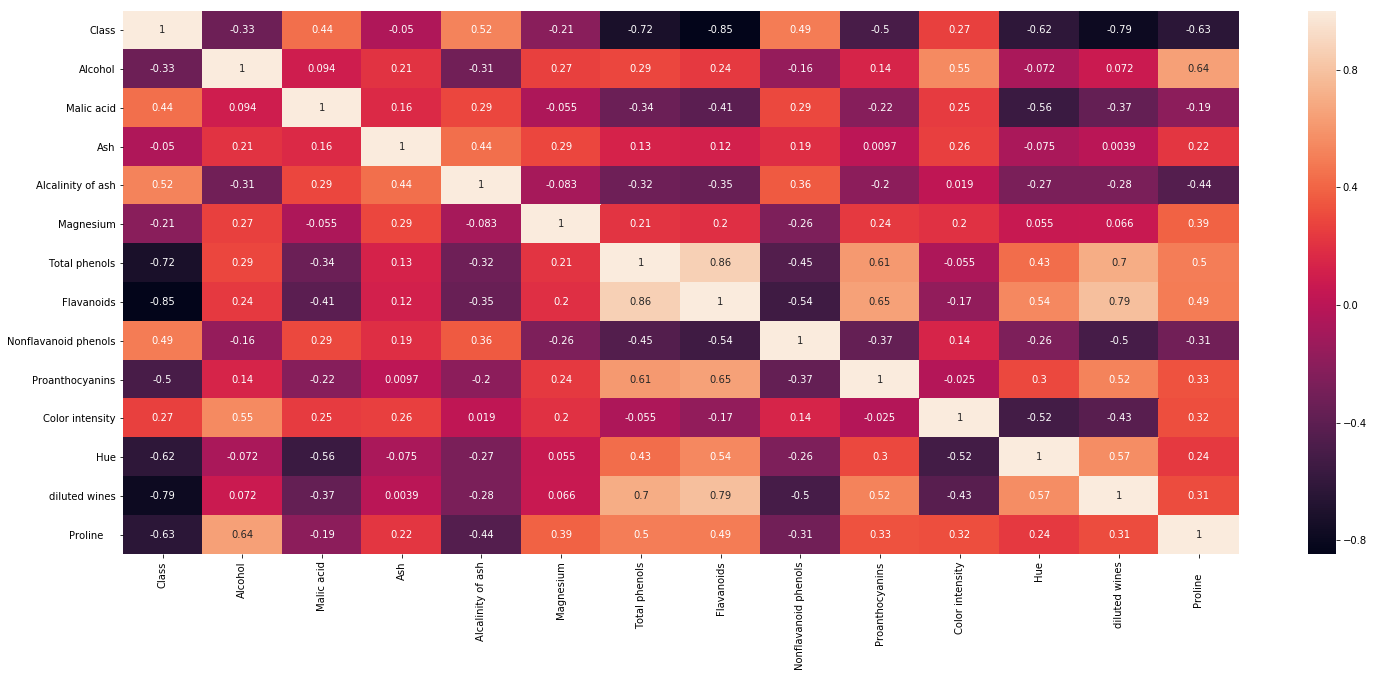

In [15]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Define X and y

In [16]:
X=df.drop(['Class'],axis=1)
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [17]:
y=df['Class']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

## Train test split

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

## Logistic Model

In [19]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()

In [20]:
#Fitting the model
lgr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
#Train data
y_pred_train=lgr.predict(X_train)

In [22]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [23]:
accuracy_score(y_train,y_pred_train)

0.9758064516129032

In [24]:
confusion_matrix(y_train,y_pred_train)

array([[43,  2,  0],
       [ 0, 52,  0],
       [ 0,  1, 26]], dtype=int64)

In [25]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        45
           2       0.95      1.00      0.97        52
           3       1.00      0.96      0.98        27

   micro avg       0.98      0.98      0.98       124
   macro avg       0.98      0.97      0.98       124
weighted avg       0.98      0.98      0.98       124



In [26]:
#Test data
y_pred_test=lgr.predict(X_test)

In [27]:
accuracy_score(y_test,y_pred_test)

0.9629629629629629

In [28]:
confusion_matrix(y_test,y_pred_test)

array([[14,  0,  0],
       [ 2, 17,  0],
       [ 0,  0, 21]], dtype=int64)

In [29]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           1       0.88      1.00      0.93        14
           2       1.00      0.89      0.94        19
           3       1.00      1.00      1.00        21

   micro avg       0.96      0.96      0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier(criterion='gini')

In [31]:
#Fitting the model
rc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
y_pred_train=rc.predict(X_train)

In [33]:
accuracy_score(y_train,y_pred_train)

1.0

In [34]:
confusion_matrix(y_train,y_pred_train)

array([[45,  0,  0],
       [ 0, 52,  0],
       [ 0,  0, 27]], dtype=int64)

In [35]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        52
           3       1.00      1.00      1.00        27

   micro avg       1.00      1.00      1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124



In [36]:
#Test data
y_pred_test=rc.predict(X_test)

In [37]:
accuracy_score(y_test,y_pred_test)

0.9814814814814815

## KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

In [39]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [40]:
y_pred_train=knn.predict(X_train)

In [41]:
accuracy_score(y_train,y_pred_train)

0.8225806451612904

In [42]:
confusion_matrix(y_train,y_pred_train)

array([[41,  1,  3],
       [ 5, 43,  4],
       [ 3,  6, 18]], dtype=int64)

In [43]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           1       0.84      0.91      0.87        45
           2       0.86      0.83      0.84        52
           3       0.72      0.67      0.69        27

   micro avg       0.82      0.82      0.82       124
   macro avg       0.81      0.80      0.80       124
weighted avg       0.82      0.82      0.82       124



In [44]:
#Test Data
y_pred_test=knn.predict(X_test)

In [45]:
accuracy_score(y_test,y_pred_test)

0.7407407407407407

In [46]:
confusion_matrix(y_test,y_pred_test)

array([[14,  0,  0],
       [ 3, 15,  1],
       [ 1,  9, 11]], dtype=int64)

In [47]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           1       0.78      1.00      0.88        14
           2       0.62      0.79      0.70        19
           3       0.92      0.52      0.67        21

   micro avg       0.74      0.74      0.74        54
   macro avg       0.77      0.77      0.75        54
weighted avg       0.78      0.74      0.73        54



## Serialization

In [48]:
import pickle

In [49]:
#Saving the model
wine_model = pickle.dumps(rc) 

In [50]:
#Load the model whenever required
rc_from_pickle = pickle.loads(wine_model) 

In [51]:
#Use model for prediction
rc_from_pickle.predict(X_test)

array([2, 3, 1, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3, 1, 3, 1, 2, 1, 3, 1,
       3, 2, 1, 1, 2, 2, 2, 3, 3, 2, 1, 2, 3, 3, 2, 2, 3, 3, 1, 3, 3, 3,
       1, 3, 3, 3, 1, 1, 1, 2, 1, 2], dtype=int64)